# Assignment 1 - Analysis Netflix raw data

**Statement:** This notebook aims to find out which countries have contributed the most titles to Netflix and how that has changed over time

**Dataset:** Kaggle “Netflix Movies and TV Shows” (`netflix_titles.csv`) 

In [1]:
## Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

DATA_DIR = Path("data/")
CSV_PATH = DATA_DIR / "netflix_titles.csv"

In [36]:
df = pd.read_csv(CSV_PATH)
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [15]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   show_id       8807 non-null   str  
 1   type          8807 non-null   str  
 2   title         8807 non-null   str  
 3   director      6173 non-null   str  
 4   cast          7982 non-null   str  
 5   country       7976 non-null   str  
 6   date_added    8797 non-null   str  
 7   release_year  8807 non-null   int64
 8   rating        8803 non-null   str  
 9   duration      8804 non-null   str  
 10  listed_in     8807 non-null   str  
 11  description   8807 non-null   str  
dtypes: int64(1), str(11)
memory usage: 825.8 KB


# Cleaning the data

- Parse `date_added` for better interpretation and handling of data
- Drop rows with null values in `country` and `rating`

In [37]:
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")
df["year_added"] = df["date_added"].dt.year

df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0


In [38]:

df_clean = df.dropna(subset=["country", "year_added"])
df_clean[["title","country", "rating", "year_added"]].head(5)

,title,country,rating,year_added
0,Dick Johnson Is Dead,United States,PG-13,2021.0
1,Blood & Water,South Africa,TV-MA,2021.0
4,Kota Factory,India,TV-MA,2021.0
7,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",TV-MA,2021.0
8,The Great British Baking Show,United Kingdom,TV-14,2021.0


# Analyzing the data

### 1. Counts by Country
- Create a mask to identify where `country` has multiple countries
- Create helper function to split the countries
- Apply function to the dataframe
- Use `value_counts()` to count the countries

### 2. Trend over Time
- Use the `groupby()` method to group by year added and country
- Unstack the data to make it more readable

In [39]:
multi_countries = df_clean["country"].str.contains(",", na=False)
df_clean[multi_countries].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021.0
29,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France",2021-09-19,2013,PG-13,106 min,Thrillers,"Blackmailed by his company's CEO, a low-level ...",2021.0
38,s39,Movie,Birth of the Dragon,George Nolfi,"Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...","China, Canada, United States",2021-09-16,2017,PG-13,96 min,"Action & Adventure, Dramas",A young Bruce Lee angers kung fu traditionalis...,2021.0
46,s47,Movie,Safe House,Daniel Espinosa,"Denzel Washington, Ryan Reynolds, Vera Farmiga...","South Africa, United States, Japan",2021-09-16,2012,R,115 min,Action & Adventure,Young CIA operative Matt Weston must get a dan...,2021.0


In [40]:
# Helper function
def split_countries(countries_string):
    clean_list = []
    raw_list = countries_string.split(",")
    for c in raw_list:
        clean_list.append(c.strip())
    return clean_list

In [ ]:
df_clean["country"] = df_clean["country"].apply(split_countries)
df_clean = df_clean.explode("country")
df_clean.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Ghana,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0


In [43]:
top_countries = df_clean["country"].value_counts().head(10)
top_countries

country
United States     3643
India             1045
United Kingdom     787
Canada             432
France             389
Japan              314
Spain              228
South Korea        226
Germany            225
Mexico             169
Name: count, dtype: int64

In [ ]:
top_3_countries = top_countries.head(3).index.tolist()
mask = df_clean["country"].isin(top_3_countries)
df_top_3 = df_clean[mask]

time_analysis = df_top_3.groupby(["year_added", "country"]).size().unstack(fill_value=0)
time_analysis.head(10)

country,India,United Kingdom,United States
year_added,,,
2008.0,0,0,2
2009.0,0,0,1
2010.0,0,0,1
2011.0,0,1,12
2012.0,0,0,3
2013.0,0,1,9
2014.0,0,3,21
2015.0,0,8,50
2016.0,13,52,196


# Visualizing findings
- Bar graph to show contributions from the top 10 countries
- Line graph to show how the top 3 countries' contribution changed over time

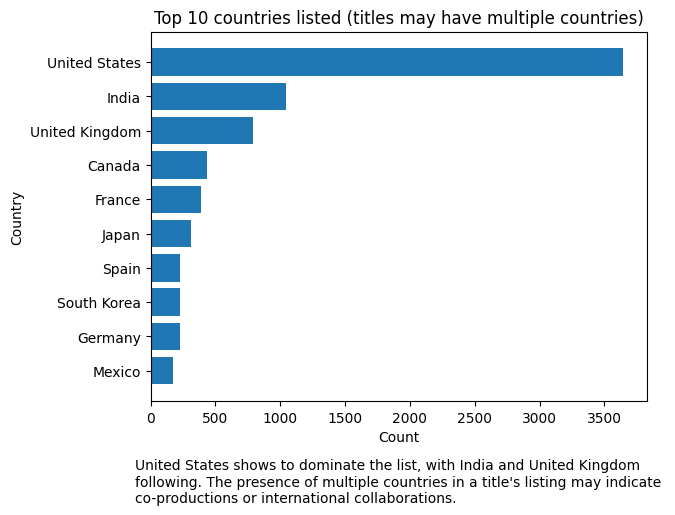

In [ ]:
plt.figure()
plt.barh(top_countries.index[::-1], top_countries.values[::-1])
plt.xlabel("Count")
plt.ylabel("Country")
plt.title("Top 10 countries listed (titles may have multiple countries)")
plt.figtext(0.1,-0.1,"United States shows to dominate the list, with India and United Kingdom " \
"\nfollowing. The presence of multiple countries in a title's listing may indicate \nco-productions or international collaborations.")
plt.show()

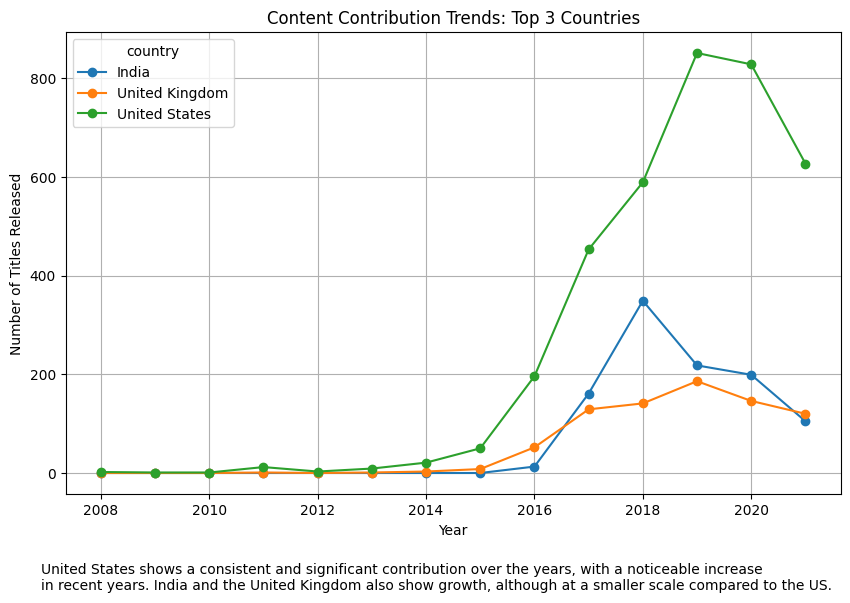

In [57]:
time_analysis.plot(kind="line", marker="o", figsize=(10,6))

plt.title('Content Contribution Trends: Top 3 Countries')
plt.xlabel('Year')
plt.ylabel('Number of Titles Released')
plt.figtext(0.1,-0.05,"United States shows a consistent and significant contribution over the years, with a noticeable increase " \
"\nin recent years. India and the United Kingdom also show growth, although at a smaller scale compared to the US.")
plt.grid(True)
plt.show()